In [1]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import time
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img
import io
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

In [2]:
datagen_1 = ImageDataGenerator(rescale=1.0/255.0)
train_it_1 = datagen_1.flow_from_directory("dataset/train",class_mode='binary', batch_size=80, target_size=(200, 200))
test_it_1 = datagen_1.flow_from_directory("dataset/test",class_mode='binary', batch_size=40, target_size=(200, 200))

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [3]:
# VGG 1 Block
def define_model1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [5]:
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 

In [4]:
training_time = []
training_loss=[]
training_acc=[]
testing_acc=[]
param =[]

************************************************** 1 , VGG-1 **************************************************
Epoch 1/8



2/2 [==============================] - 10s 6s/step - loss: 17.2871 - accuracy: 0.5625 - val_loss: 0.7949 - val_accuracy: 0.5000
Epoch 2/8
2/2 [==============================] - 8s 5s/step - loss: 0.7423 - accuracy: 0.5000 - val_loss: 0.6755 - val_accuracy: 0.6500
Epoch 3/8
2/2 [==============================] - 7s 4s/step - loss: 0.6476 - accuracy: 0.6812 - val_loss: 0.6315 - val_accuracy: 0.5250
Epoch 4/8
2/2 [==============================] - 8s 3s/step - loss: 0.6088 - accuracy: 0.5375 - val_loss: 0.5861 - val_accuracy: 0.6250
Epoch 5/8
2/2 [==============================] - 7s 4s/step - loss: 0.5439 - accuracy: 0.7812 - val_loss: 0.5506 - val_accuracy: 0.7000
Epoch 6/8
2/2 [==============================] - 7s 4s/step - loss: 0.4976 - accuracy: 0.7875 - val_loss: 0.5318 - val_accuracy: 0.7250
Epoch 7/8
2/2 [==============================] - 6s 3s/step - loss: 0.4491 - accuracy: 0.8062 - val_loss: 0.5572 - val_accuracy: 0.7250
Epoch 8/8
2/2 [==============================] - 7s 4s/s

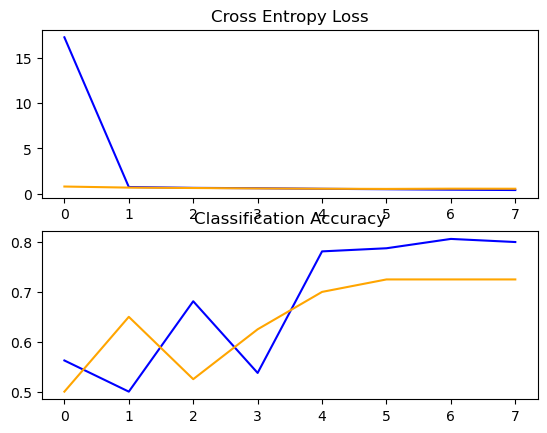

In [6]:
model = define_model1()
print("*"*50, 1, ",", "VGG-1", "*"*50)

#train_it, test_it from VGG 1
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, update_freq='batch')
start = time.time()
history_1 = model.fit(train_it_1, steps_per_epoch=len(train_it_1),validation_data=test_it_1, validation_steps=len(test_it_1), epochs=8, verbose=1)
end = time.time()
time_taken = end -start 

_, acc_test = model.evaluate(test_it_1, steps=len(test_it_1), verbose=0)
print("Testing accuracy: ", '> %.3f' % (acc_test * 100.0))
_, acc_train = model.evaluate(train_it_1, steps=len(train_it_1), verbose=0)
print("Training accuracy: ",'> %.3f' % (acc_train * 100.0))

no_of_params=model.count_params()
print("Number of parameters: ",no_of_params)
loss = history_1.history['loss'][-1]
print('Training loss: ', history_1.history['loss'][-1])
training_time.append(time_taken)
training_loss.append(loss)
training_acc.append(acc_train)
testing_acc.append(acc_test)
param.append(no_of_params)

summarize_diagnostics(history_1)

In [7]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [9]:
# VGG 3
datagen_2 = ImageDataGenerator(rescale=1.0/255.0)
train_it_2 = datagen_2.flow_from_directory("dataset/train",class_mode='binary', batch_size=80, target_size=(200, 200))
test_it_2 = datagen_2.flow_from_directory("dataset/test",class_mode='binary', batch_size=40, target_size=(200, 200))

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [34]:
def define_model2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
    return model

In [35]:
model = define_model2()
print("*"*50, 2, ",", "VGG-3", "*"*50)

start = time.time()
history_2 = model.fit(train_it_2, steps_per_epoch=len(train_it_2),validation_data=test_it_2, validation_steps=len(test_it_2), epochs=8, verbose=2)
end = time.time()
time_taken = end -start 
        
_, acc_test = model.evaluate(test_it_2, steps=len(test_it_2), verbose=0)
print("Testing accuracy: ", '> %.3f' % (acc_test * 100.0))
_, acc_train = model.evaluate(train_it_2, steps=len(train_it_2), verbose=0)
print("Training accuracy: ",'> %.3f' % (acc_train * 100.0))
print(model.summary())
no_of_params=model.count_params()
print("Number of parameters: ",no_of_params)
loss = history_2.history['loss'][-1]
print('Training loss: ', history_2.history['loss'][-1])
training_time.append(time_taken)
training_loss.append(loss)
training_acc.append(acc_train)
testing_acc.append(acc_test)
param.append(no_of_params)

summarize_diagnostics(history_2)

************************************************** 2 , VGG-3 **************************************************
Epoch 1/8
2/2 - 14s - loss: 3.3600 - accuracy: 0.5312 - val_loss: 1.5585 - val_accuracy: 0.5000 - 14s/epoch - 7s/step
Epoch 2/8
2/2 - 9s - loss: 1.1145 - accuracy: 0.5000 - val_loss: 0.7040 - val_accuracy: 0.5000 - 9s/epoch - 4s/step
Epoch 3/8


KeyboardInterrupt: 

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it_3 = train_datagen.flow_from_directory("dataset/train",class_mode='binary', batch_size=80, target_size=(200, 200))
test_it_3 = test_datagen.flow_from_directory("dataset/test",class_mode='binary', batch_size=40, target_size=(200, 200))

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


************************************************** 3 , VGG-3 with augmentation **************************************************
Epoch 1/8
2/2 [==============================] - 13s 7s/step - loss: 4.7925 - accuracy: 0.5750 - val_loss: 3.5976 - val_accuracy: 0.5000
Epoch 2/8
2/2 [==============================] - 11s 6s/step - loss: 1.8873 - accuracy: 0.5000 - val_loss: 0.7434 - val_accuracy: 0.5000
Epoch 3/8
2/2 [==============================] - 11s 6s/step - loss: 0.7528 - accuracy: 0.5000 - val_loss: 0.6748 - val_accuracy: 0.6750
Epoch 4/8
2/2 [==============================] - 10s 6s/step - loss: 0.6940 - accuracy: 0.5437 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 5/8
2/2 [==============================] - 10s 6s/step - loss: 0.6952 - accuracy: 0.4875 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 6/8
2/2 [==============================] - 9s 5s/step - loss: 0.6846 - accuracy: 0.5813 - val_loss: 0.6142 - val_accuracy: 0.7000
Epoch 7/8
2/2 [==============================] - 

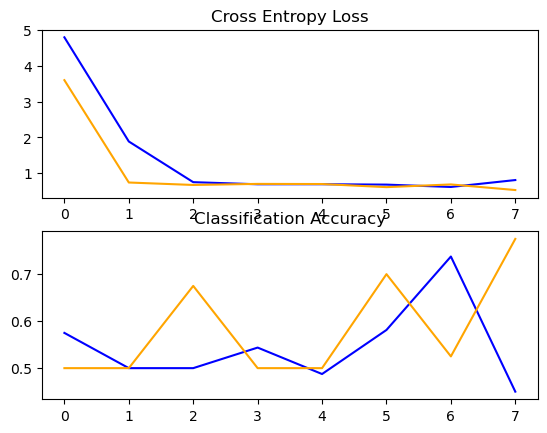

In [13]:
model = define_model2()
print("*"*50, 3, ",", "VGG-3 with augmentation", "*"*50)

start = time.time()
history_3 = model.fit(train_it_3, steps_per_epoch=len(train_it_3),validation_data=test_it_3, validation_steps=len(test_it_3), epochs=8, verbose=1)
end = time.time()
time_taken = end -start 
        
_, acc_test = model.evaluate(test_it_3, steps=len(test_it_3), verbose=0)
print("Testing accuracy: ", '> %.3f' % (acc_test * 100.0))
_, acc_train = model.evaluate(train_it_3, steps=len(train_it_3), verbose=0)
print("Training accuracy: ",'> %.3f' % (acc_train * 100.0))


no_of_params=model.count_params()
print("Number of parameters: ",no_of_params)
loss = history_3.history['loss'][-1]
print('Training loss: ', history_3.history['loss'][-1])
training_time.append(time_taken)
training_loss.append(loss)
training_acc.append(acc_train)
testing_acc.append(acc_test)
param.append(no_of_params)

summarize_diagnostics(history_3)

In [14]:
# VGG 16 

datagen_3 = ImageDataGenerator(featurewise_center=True)
datagen_3.mean = [123.68, 116.779, 103.939]
train_it_4 = datagen_3.flow_from_directory("dataset/train",class_mode='binary', batch_size = 80 , target_size=(224, 224))
test_it_4 = datagen_3.flow_from_directory("dataset/test",class_mode='binary', batch_size= 40, target_size=(224, 224))

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
# VGG 16 (excluding convolution layers)
from keras.applications.vgg16 import VGG16
from keras.models import Model

def define_model3():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    model = Model(inputs=model.inputs, outputs=output)
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


************************************************** 4 , VGG 16 (excluding convolution layers) ***********************************
Epoch 1/8
2/2 [==============================] - 41s 23s/step - loss: 228.5909 - accuracy: 0.4313 - val_loss: 2367.0518 - val_accuracy: 0.5000
Epoch 2/8
2/2 [==============================] - 37s 21s/step - loss: 1291.4381 - accuracy: 0.7312 - val_loss: 0.1300 - val_accuracy: 0.9250
Epoch 3/8
2/2 [==============================] - 38s 21s/step - loss: 0.0676 - accuracy: 0.9875 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 4/8
2/2 [==============================] - 37s 21s/step - loss: 2.4466e-05 - accuracy: 1.0000 - val_loss: 3.1283e-05 - val_accuracy: 1.0000
Epoch 5/8
2/2 [==============================] - 37s 21s/step - loss: 5.2111e-08 - accuracy: 1.0000 - val_loss: 6.2890e-07 - val_accuracy: 1.0000
Epoch 6/8
2/2 [==============================] - 37s 21s/step - loss: 1.6307e-09 - accuracy: 1.0000 - val_loss: 2.2406e-08 - val_accuracy: 1.0000
Epoch 7/8
2

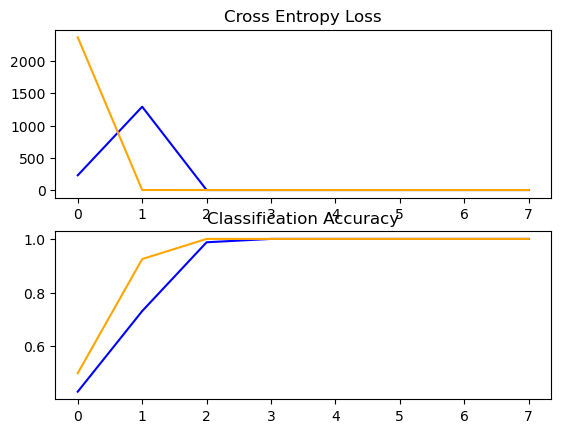

In [20]:
model = define_model3()
print("*"*50, 4, ",", "VGG 16 (excluding convolution layers)", "*"*35)

start = time.time()
history_4 = model.fit(train_it_4, steps_per_epoch=len(train_it_4),validation_data=test_it_4, validation_steps=len(test_it_4), epochs=8, verbose=1)
end = time.time()
time_taken = end -start 
        
_, acc_test = model.evaluate(test_it_4, steps=len(test_it_4), verbose=0)
print("Testing accuracy: ", '> %.3f' % (acc_test * 100.0))
_, acc_train = model.evaluate(train_it_4, steps=len(train_it_4), verbose=0)
print("Training accuracy: ",'> %.3f' % (acc_train * 100.0))


no_of_params=model.count_params()
print("Number of parameters: ",no_of_params)
loss = history_4.history['loss'][-1]
print('Training loss: ', history_4.history['loss'][-1])
training_time.append(time_taken)
training_loss.append(loss)
training_acc.append(acc_train)
testing_acc.append(acc_test)
param.append(no_of_params)

summarize_diagnostics(history_4)

In [21]:
# VGG 16 (including convolution layers)

def define_model4():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # for layer in model.layers:
      #  layer.trainable = False --- cause layer.trainable = True default.
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    model = Model(inputs=model.inputs, outputs=output)
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

********************************************* 5 , VGG 16 (including convolution layers) ***********************************
Epoch 1/8
2/2 [==============================] - 124s 76s/step - loss: 560.0356 - accuracy: 0.5312 - val_loss: 280102451947656708096.0000 - val_accuracy: 0.5000
Epoch 2/8
2/2 [==============================] - 199s 107s/step - loss: 100455015100033531904.0000 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/8
2/2 [==============================] - 196s 104s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/8
2/2 [==============================] - 236s 127s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/8
2/2 [==============================] - 91s 39s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/8
2/2 [==============================] - 67s 36s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

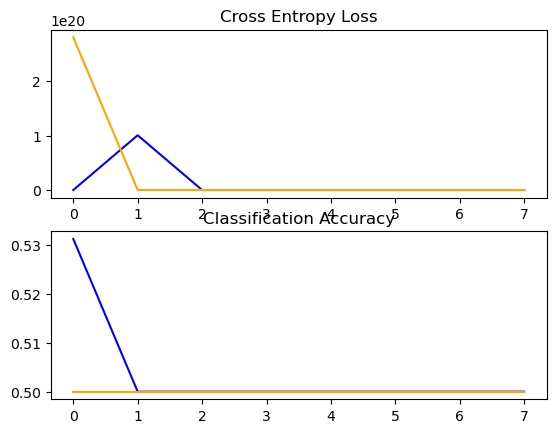

In [22]:
model = define_model4()
print("*"*45, 5, ",", "VGG 16 (including convolution layers)", "*"*35)

start = time.time()
history_5 = model.fit(train_it_4, steps_per_epoch=len(train_it_4),validation_data=test_it_4, validation_steps=len(test_it_4), epochs=8, verbose=1)
end = time.time()
time_taken = end -start 
        
_, acc_test = model.evaluate(test_it_4, steps=len(test_it_4), verbose=0)
print("Testing accuracy: ", '> %.3f' % (acc_test * 100.0))
_, acc_train = model.evaluate(train_it_4, steps=len(train_it_4), verbose=0)
print("Training accuracy: ",'> %.3f' % (acc_train * 100.0))


no_of_params=model.count_params()
print("Number of parameters: ",no_of_params)
loss = history_5.history['loss'][-1]
print('Training loss: ', history_5.history['loss'][-1])
training_time.append(time_taken)
training_loss.append(loss)
training_acc.append(acc_train)
testing_acc.append(acc_test)
param.append(no_of_params)

summarize_diagnostics(history_5)

In [23]:
def mlp():

    model = Sequential()
    model.add(Flatten(input_shape=(200, 200, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [29]:
model  = mlp()

train_it, test_it  = train_it_1, test_it_1

start = time.time()
history_6 = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=8, verbose=0)
end = time.time()
time_taken = end -start

_, acc_test = model.evaluate(test_it, steps=len(test_it), verbose=0)
print("Testing accuracy: ", '> %.3f' % (acc_test * 100.0))
_, acc_train = model.evaluate(train_it, steps=len(train_it), verbose=0)
print("Training accuracy: ",'> %.3f' % (acc_train * 100.0))

no_of_params=model.count_params()
print("Number of parameters: ",no_of_params)
loss = history_6.history['loss'][-1]
print('Training loss: ', history_6.history['loss'][-1])
training_time.append(time_taken)
training_loss.append(loss)
training_acc.append(acc_train)
testing_acc.append(acc_test)
param.append(no_of_params)

Testing accuracy:  > 80.000
Training accuracy:  > 84.375
Number of parameters:  15368449
Training loss:  1.1596683263778687


In [30]:
 df = pd.DataFrame({"Training time": training_time, "Training loss": training_loss, 
                    "Training accuracy": training_acc, "Testing accuracy": testing_acc, "Number of model parameters": param})

In [31]:
df

,Training time,Training loss,Training accuracy,Testing accuracy,Number of model parameters
0,62.833666,4.071399e-01,0.82500,0.725,40961153
1,79.754586,5.427579e-01,0.75625,0.800,10333505
2,90.727797,8.117550e-01,0.83125,0.775,10333505
3,304.648694,2.511507e-10,1.00000,1.000,17926209
4,1062.800246,6.931949e-01,0.50000,0.500,17926209
5,40.561056,2.937551e+00,0.56250,0.600,15368449
6,40.407688,1.159668e+00,0.84375,0.800,15368449


In [27]:
df.drop(df.tail(1).index, inplace=True)

In [28]:
df

,Training time,Training loss,Training accuracy,Testing accuracy,Number of model parameters
0,62.833666,4.071399e-01,0.82500,0.725,40961153
1,79.754586,5.427579e-01,0.75625,0.800,10333505
2,90.727797,8.117550e-01,0.83125,0.775,10333505
3,304.648694,2.511507e-10,1.00000,1.000,17926209
4,1062.800246,6.931949e-01,0.50000,0.500,17926209


In [32]:
def image_grid(images, labels, class_names, rows=5, cols=8):
    """
    Create a grid of images with corresponding labels.
    """
    # Create the figure and axis objects.
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))

    # Iterate over the images and labels and plot them in the grid.
    for i, ax in enumerate(axs.flatten()):
        # Plot the image.
        ax.imshow(images[i], cmap='gray')

        # Set the label.
        class_idx = labels[i]
        print(class_idx)
        class_name = class_names[class_idx]
        print(class_name)
        ax.set_title(class_name)

        # Remove the axis ticks and labels.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Adjust the spacing between the subplots.
    plt.tight_layout()

    return fig


def plot_to_image(figure):
    """
    Convert a Matplotlib figure to a PNG image and return it as a TensorFlow tensor.
    """
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)

    # Decode the PNG image into a TensorFlow tensor.
    image = tf.image.decode_png(buf.getvalue(), channels=4)

    # Add the batch dimension.
    image = tf.expand_dims(image, 0)

    return image


In [33]:
model = define_model2()
print("*"*50, 3, ",", "VGG-3 with augmentation", "*"*50)

train_it, test_it  = train_it_3, test_it_3

train_writer = tf.summary.create_file_writer("logs/" + "VGG-3 with augmentation"  + "/train/")
test_writer = tf.summary.create_file_writer("logs/" + "VGG-3 with augmentation"  + "/test/")
train_step = test_step = 0
for epoch in range(5):
    train_it.reset()
    for batch in range(len(train_it)):
        x_train, y_train = train_it.next()
        train_loss, train_acc = model.train_on_batch(x_train, y_train)

        with train_writer.as_default():
            tf.summary.scalar("TRAIN Loss", train_loss, step=train_step)
            tf.summary.scalar("TRAIN Accuracy", train_acc, step=train_step)
            train_step += 1

        val_loss, val_acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
        with test_writer.as_default():
            tf.summary.scalar("TEST Loss", val_loss, step=test_step)
            tf.summary.scalar("TEST Accuracy", val_acc, step=test_step)
            test_step += 1

    test_it.reset()

    print(model.predict(test_it))
    prediction = model.predict(test_it)
    sum_ = 0
    for i in range(len(prediction)):
        prediction[i] = round(prediction[i][0]) 
        sum_ += prediction[i][0]
    print("sum",sum_)
    print(prediction)
    test_it.reset()
    _, acc_test = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print("Testing accuracy: ", '> %.3f' % (acc_test * 100.0))

labels = ["jalebi", "samosa"]

test_it.reset()
images,y=test_it.next()
predict = []

for k in range(40):
    image = images[k]
    image = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
    image = image.reshape(1,200,200,3)

predict = np.array(predict).flatten()
print (np.array(y),predict,prediction)
figure = image_grid(images, predict, labels)
file_writer = tf.summary.create_file_writer("logs/" + "VGG-3 with augmentation"  + "/test_images/")
with file_writer.as_default():
    tf.summary.image("predicted Images", plot_to_image(figure), step=step)
    step += 1


************************************************** 3 , VGG-3 with augmentation **************************************************
1/1 [==============================] - 2s 2s/step
[[0.5568852 ]
 [0.58932835]
 [0.6203241 ]
 [0.5890752 ]
 [0.57001364]
 [0.596404  ]
 [0.5810745 ]
 [0.5616465 ]
 [0.57511306]
 [0.6180864 ]
 [0.5841526 ]
 [0.58468884]
 [0.5815887 ]
 [0.59344834]
 [0.6042235 ]
 [0.5519925 ]
 [0.57097334]
 [0.6090299 ]
 [0.59326535]
 [0.56520164]
 [0.601723  ]
 [0.5965082 ]
 [0.5867515 ]
 [0.5964635 ]
 [0.60021126]
 [0.6166993 ]
 [0.55298346]
 [0.5622104 ]
 [0.5893099 ]
 [0.5738902 ]
 [0.6135804 ]
 [0.605221  ]
 [0.5831493 ]
 [0.5632784 ]
 [0.5765857 ]
 [0.5456127 ]
 [0.553888  ]
 [0.57093817]
 [0.5721544 ]
 [0.5693119 ]]
1/1 [==============================] - 2s 2s/step
sum 40.0
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [

NameError: name 'cv2' is not defined